# **Grupo**
- Camila Ribeiro Passos
- Thais de Jesus Soares  

#**Controle do Volume Celular**

## **Modelo no Equilíbrio**

In [10]:
# Bibliotecas Utilizadas
import numpy as np
from matplotlib import pyplot as plt
import cmath 

In [11]:
# Parâmetros:

Na_e = 145                # Concentração de Sódio no meio extracelular
K_e = 3.5                 # Concentração de Potássio no meio extracelular
pe = -266.64              # Pressão no meio extracelular
T = 370                   # Temperatura absoluta
R = 8.314                 # Constante Universal dos Gases
F = 96485.3329            # Constante de Faraday
Imax = 13                 # Taxa da Bomba                   
Cm = 1                    # Capacitância total da célula

k_K = 2                   
k_Na = 7.7 
gamma = 1 / (1.56e-4)     
nw = 1.7e-5
S = 1

In [12]:
# Condições Iniciais (t = 0):

alpha_i0 = 0.8695652      # Volume interno inicial da célula
Na_i0 = 10.0              # Concentração inicial de Sódio no meio intracelular 
K_i0 = 130.0              # Concentração inicial de Potássio no meio extracelular
V0 = -70.0                # Potencial inicial da membrana

In [13]:
# Constantes (foram obtidas, considerando que, em t = 0, todas as EDO's são nulas (equações em equilíbrio)):

# Condutância inicial do Potássio
g_K = (3 * Imax * (1 + k_K / K_e)**-2 * (1 + k_Na / Na_i0)**-3) / (V0 - ((R * T) / F) * np.log(K_e / K_i0))

# Condutância inicial do Sódio
g_Na = -(2 * Imax * (1 + k_K / K_e)**-2 * (1 + k_Na / Na_i0)**-3) / (V0 - ((R * T) / F) * np.log(Na_e / Na_i0))

# Razão entre a quantidade de proteinas no meio intracelular e o volume total da célula
xi_wt = alpha_i0 * (- Na_i0 - K_i0 + Na_e + K_e)

In [14]:
# Funções:

def calc_dNa_i (alpha_i, INa_aux, Na_i, dAlpha_i):
  return 1 / alpha_i * (- gamma / F * (INa_aux + (2 * Imax * (1 + k_K / K_e)**-2 * (1 + k_Na /Na_i)**-3)) - dAlpha_i * Na_i)

def calc_dK_i (alpha_i, IK_aux, Na_i, K_i, dAlpha_i):
  return 1 / alpha_i * (- gamma / F * (IK_aux - (3 * Imax * (1 + k_K / K_e)**-2 * (1 + k_Na /Na_i)**-3)) - dAlpha_i * K_i)

def calc_dAlpha_i (pi, Na_i, K_i, alpha_i):
  return -gamma * nw * (pi - pe - R * T * (Na_i + K_i + (xi_wt / (alpha_i)) - Na_e - K_e))

def calc_dV (INa_aux, IK_aux, Na_i):
  return INa_aux + IK_aux - Imax * (1 + k_K / K_e)**-2 * (1 + k_Na / Na_i)**-3

def calc_pi (alpha_i):
  return pe + S * (alpha_i - alpha_i0)

def calc_INa (Na_i, v):
  return g_Na * (v - ((R * T) / F) * cmath.log(Na_e / Na_i))

def calc_IK (K_i, v):
  return g_K * (v - ((R * T) / F) * cmath.log(K_e / K_i))

In [16]:
dt = 0.00001                    # Passo de tempo
li = 0                          # Limite Inferior - define instante de tempo inicial
ls = 50                         # Limite Superior - define instante de tempo final
N = abs(ls - li) / dt           # Número total de iterações consideradas
t = li;                         # Tempo inicial

V = [V0]                        # Vetor com o potencial da membrana a cada instante de tempo
Na_I = [Na_i0]                  # Vetor com a concentração de Sódio no meio intracelular a cada instante de tempo
K_I = [K_i0]                    # Vetor com a concentração de Potássio no meio intracelular a cada instante de tempo
Alpha_I = [alpha_i0]            # Vetor com o valor de alpha_i (volume interno / volume total) a cada instante de tempo
dAlpha_I = [0]                  # Vetor com o valor da derivada de alpha_i a cada instante de tempo
Pi = [calc_pi(alpha_i0)]        # Vetor com a pressão no meio intracelular a cada instante de tempo
INa = [calc_INa(Na_i0, V0)]     # Vetor com a corrente de Sódio a cada instante de tempo
IK = [calc_IK(K_i0, V0)]        # Vetor com a corrente de Potássio a cada instante de tempo
Tempo = [t]                     # Vetor com cada instante de tempo

# Aplicação do Método de Euler Explícito
for k in range(1, int(N + 1)):

  # Cálculo da derivada da concentração de sódio no meio intracelular
  dNa_i = calc_dNa_i(Alpha_I[k - 1], INa[k - 1], Na_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada da concentração de potássio no meio intracelular
  dK_i = calc_dK_i(Alpha_I[k - 1], IK[k - 1], Na_I[k - 1], K_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada de alpha_i
  dAlpha_i = calc_dAlpha_i(Pi[k - 1], Na_I[k - 1], K_I[k - 1], Alpha_I[k - 1])
  # Cálculo da derivada do potencial da membrana
  dV = calc_dV(INa[k - 1], IK[k - 1], Na_I[k - 1])

  # Atribuição da concentração de sódio, no meio intracelular, na iteração k
  Na_I.append(dNa_i * dt + Na_I[k - 1])
  # Atribuição da concentração de potássio, no meio intracelular, na iteração k
  K_I.append(dK_i * dt + K_I[k - 1])
  # Atribuição de alpha_i na iteração k
  Alpha_I.append(dAlpha_i * dt + Alpha_I[k - 1])
  # Atribuição do potencial da membrana na iteração k
  V.append(dV * dt + V[k - 1])
  # Atribuição do instante de tempo na iteração k
  Tempo.append(Tempo[-1] + dt)
  # Atribuição da derivada de alpha_i na iteração k
  dAlpha_I.append(dAlpha_i)
  # Atribuição da pressão intracelular na iteração k
  Pi.append(calc_pi(Alpha_I[k]))
  # Atribuição da corrente de sódio na iteração k
  INa.append(calc_INa(Na_I[k], V[k]))
  # Atribuição da corrente de potássio na iteração k
  IK.append(calc_IK(K_I[k], V[k]))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


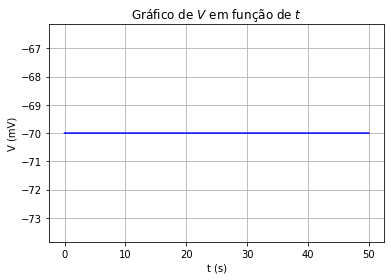

In [17]:
plt.figure()
plt.plot(Tempo, V,color="blue")
plt.title(r"Gráfico de ${V}$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.savefig("g1.png")
plt.show()

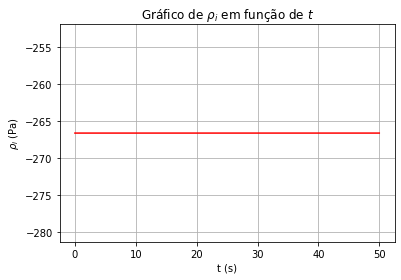

In [18]:
plt.figure()
plt.plot(Tempo, Pi, color='red')
plt.title(r"Gráfico de $\rho_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\rho_i$ (Pa)")
plt.grid(True)
plt.savefig("g2.png")
plt.show()

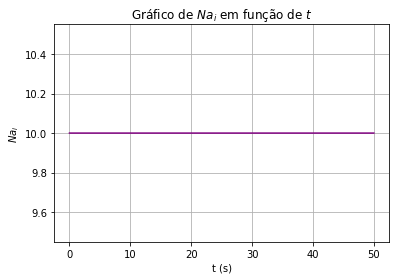

In [19]:
plt.figure()
plt.plot(Tempo, Na_I, color="purple")
plt.title(r"Gráfico de ${Na}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${Na}_i$")
plt.grid(True)
plt.savefig("g3.png")
plt.show()

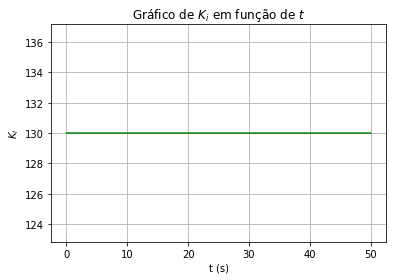

In [20]:
plt.figure()
plt.plot(Tempo, K_I, color="green")
plt.title(r"Gráfico de ${K}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${K}_i$")
plt.grid(True)
plt.savefig("g4.png")
plt.show()

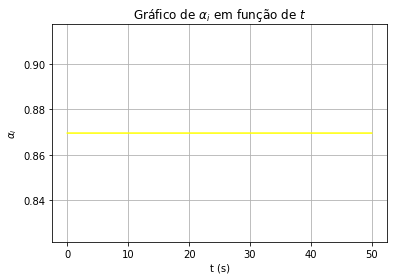

In [21]:
plt.figure()
plt.plot(Tempo, Alpha_I, color="yellow")
plt.title(r"Gráfico de $\alpha_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\alpha_i$")
plt.grid(True)
plt.savefig("g5.png")
plt.show()

## **Alteração 1: $I_{max}$ = 5**

In [22]:
Imax = 5

In [23]:
dt = 0.00001                    # Passo de tempo
li = 0                          # Limite Inferior - define instante de tempo inicial
ls = 50                         # Limite Superior - define instante de tempo final
N = abs(ls - li) / dt           # Número total de iterações consideradas
t = li;                         # Tempo inicial

V = []                          # Vetor com o potencial da membrana a cada instante de tempo
V.append(V0)
Na_I = []                       # Vetor com a concentração de Sódio no meio intracelular a cada instante de tempo
Na_I.append(Na_i0)
K_I = []                        # Vetor com a concentração de Potássio no meio intracelular a cada instante de tempo
K_I.append(K_i0)
Alpha_I = []                    # Vetor com o valor de alpha_i (volume interno / volume total) a cada instante de tempo
Alpha_I.append(alpha_i0)
dAlpha_I = []                   # Vetor com o valor da derivada de alpha_i a cada instante de tempo
dAlpha_I.append(0)
Pi = []                         # Vetor com a pressão no meio intracelular a cada instante de tempo
Pi.append(calc_pi(alpha_i0))
INa = []                        # Vetor com a corrente de Sódio a cada instante de tempo
INa.append(calc_INa(Na_i0, V0))
IK = []                         # Vetor com a corrente de Potássio a cada instante de tempo
IK.append(calc_IK(K_i0, V0))
Tempo = []                     # Vetor com cada instante de tempo
Tempo.append(t)

# Aplicação do Método de Euler Explícito
for k in range(1, int(N + 1)):

  # Cálculo da derivada da concentração de sódio no meio intracelular
  dNa_i = calc_dNa_i(Alpha_I[k - 1], INa[k - 1], Na_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada da concentração de potássio no meio intracelular
  dK_i = calc_dK_i(Alpha_I[k - 1], IK[k - 1], Na_I[k - 1], K_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada de alpha_i
  dAlpha_i = calc_dAlpha_i(Pi[k - 1], Na_I[k - 1], K_I[k - 1], Alpha_I[k - 1])
  # Cálculo da derivada do potencial da membrana
  dV = calc_dV(INa[k - 1], IK[k - 1], Na_I[k - 1])

  # Atribuição da concentração de sódio, no meio intracelular, na iteração k
  Na_I.append(dNa_i * dt + Na_I[k - 1])
  # Atribuição da concentração de potássio, no meio intracelular, na iteração k
  K_I.append(dK_i * dt + K_I[k - 1])
  # Atribuição de alpha_i na iteração k
  Alpha_I.append(dAlpha_i * dt + Alpha_I[k - 1])
  # Atribuição do potencial da membrana na iteração k
  V.append(dV * dt + V[k - 1])
  # Atribuição do instante de tempo na iteração k
  Tempo.append(Tempo[-1] + dt)
  # Atribuição da derivada de alpha_i na iteração k
  dAlpha_I.append(dAlpha_i)
  # Atribuição da pressão intracelular na iteração k
  Pi.append(calc_pi(Alpha_I[k]))
  # Atribuição da corrente de sódio na iteração k
  INa.append(calc_INa(Na_I[k], V[k]))
  # Atribuição da corrente de potássio na iteração k
  IK.append(calc_IK(K_I[k], V[k]))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


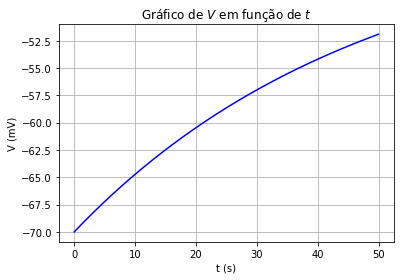

In [24]:
plt.figure()
plt.plot(Tempo, V,color="blue")
plt.title(r"Gráfico de ${V}$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.savefig("g6.png")
plt.show()

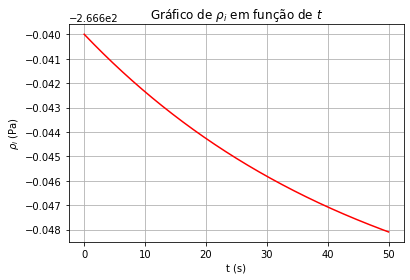

In [25]:
plt.figure()
plt.plot(Tempo, Pi, color="red")
plt.title(r'Gráfico de $\rho_i$ em função de ${t}$')
plt.xlabel('t (s)')
plt.ylabel(r'$\rho_i$ (Pa)')
plt.grid(True)
plt.savefig("g7.png")
plt.show()

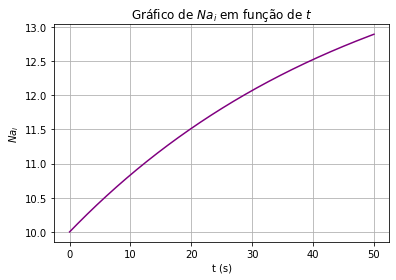

In [26]:
plt.figure()
plt.plot(Tempo, Na_I, color="purple")
plt.title(r"Gráfico de ${Na}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${Na}_i$")
plt.grid(True)
plt.savefig("g8.png")
plt.show()

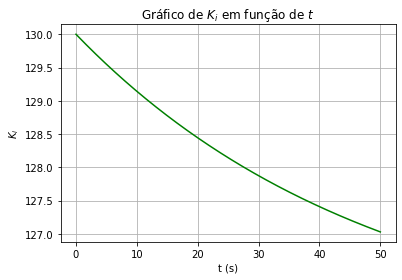

In [27]:
plt.figure()
plt.plot(Tempo, K_I, color="green")
plt.title(r"Gráfico de ${K}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${K}_i$")
plt.grid(True)
plt.savefig("g9.png")
plt.show()

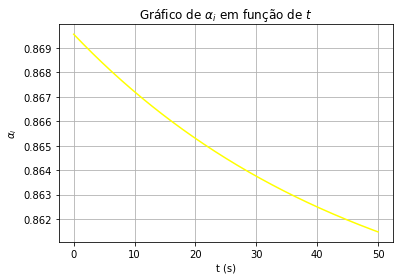

In [28]:
plt.figure()
plt.plot(Tempo, Alpha_I, color="yellow")
plt.title(r"Gráfico de $\alpha_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\alpha_i$")
plt.grid(True)
plt.savefig("g10.png")
plt.show()

## **Alteração 2: $I_{max}$ = 10**

In [29]:
Imax = 10

In [30]:
dt = 0.00001                    # Passo de tempo
li = 0                          # Limite Inferior - define instante de tempo inicial
ls = 50                         # Limite Superior - define instante de tempo final
N = abs(ls - li) / dt           # Número total de iterações consideradas
t = li;                         # Tempo inicial

V = []                          # Vetor com o potencial da membrana a cada instante de tempo
V.append(V0)
Na_I = []                       # Vetor com a concentração de Sódio no meio intracelular a cada instante de tempo
Na_I.append(Na_i0)
K_I = []                        # Vetor com a concentração de Potássio no meio intracelular a cada instante de tempo
K_I.append(K_i0)
Alpha_I = []                    # Vetor com o valor de alpha_i (volume interno / volume total) a cada instante de tempo
Alpha_I.append(alpha_i0)
dAlpha_I = []                   # Vetor com o valor da derivada de alpha_i a cada instante de tempo
dAlpha_I.append(0)
Pi = []                         # Vetor com a pressão no meio intracelular a cada instante de tempo
Pi.append(calc_pi(alpha_i0))
INa = []                        # Vetor com a corrente de Sódio a cada instante de tempo
INa.append(calc_INa(Na_i0, V0))
IK = []                         # Vetor com a corrente de Potássio a cada instante de tempo
IK.append(calc_IK(K_i0, V0))
Tempo = []                     # Vetor com cada instante de tempo
Tempo.append(t)

# Aplicação do Método de Euler Explícito
for k in range(1, int(N + 1)):

  # Cálculo da derivada da concentração de sódio no meio intracelular
  dNa_i = calc_dNa_i(Alpha_I[k - 1], INa[k - 1], Na_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada da concentração de potássio no meio intracelular
  dK_i = calc_dK_i(Alpha_I[k - 1], IK[k - 1], Na_I[k - 1], K_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada de alpha_i
  dAlpha_i = calc_dAlpha_i(Pi[k - 1], Na_I[k - 1], K_I[k - 1], Alpha_I[k - 1])
  # Cálculo da derivada do potencial da membrana
  dV = calc_dV(INa[k - 1], IK[k - 1], Na_I[k - 1])

  # Atribuição da concentração de sódio, no meio intracelular, na iteração k
  Na_I.append(dNa_i * dt + Na_I[k - 1])
  # Atribuição da concentração de potássio, no meio intracelular, na iteração k
  K_I.append(dK_i * dt + K_I[k - 1])
  # Atribuição de alpha_i na iteração k
  Alpha_I.append(dAlpha_i * dt + Alpha_I[k - 1])
  # Atribuição do potencial da membrana na iteração k
  V.append(dV * dt + V[k - 1])
  # Atribuição do instante de tempo na iteração k
  Tempo.append(Tempo[-1] + dt)
  # Atribuição da derivada de alpha_i na iteração k
  dAlpha_I.append(dAlpha_i)
  # Atribuição da pressão intracelular na iteração k
  Pi.append(calc_pi(Alpha_I[k]))
  # Atribuição da corrente de sódio na iteração k
  INa.append(calc_INa(Na_I[k], V[k]))
  # Atribuição da corrente de potássio na iteração k
  IK.append(calc_IK(K_I[k], V[k]))

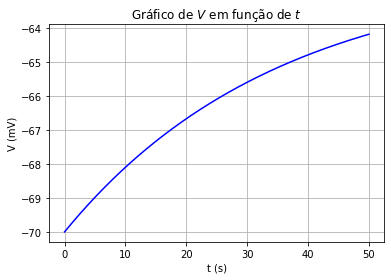

In [31]:
plt.figure()
plt.plot(Tempo, V,color='blue')
plt.title(r"Gráfico de ${V}$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.savefig("g11.png")
plt.show()

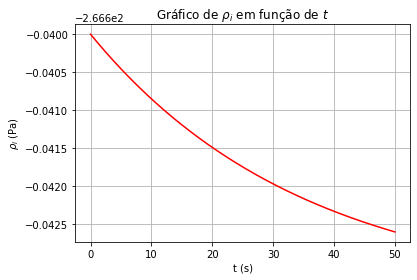

In [32]:
plt.figure()
plt.plot(Tempo, Pi, color='red')
plt.title(r"Gráfico de $\rho_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\rho_i$ (Pa)")
plt.grid(True)
plt.savefig("g12.png")
plt.show()

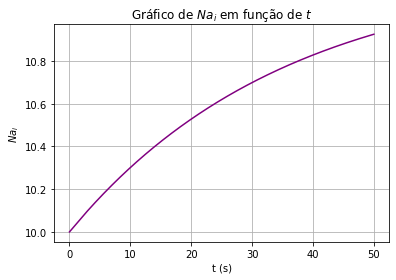

In [33]:
plt.figure()
plt.plot(Tempo, Na_I, color="purple")
plt.title(r"Gráfico de ${Na}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${Na}_i$")
plt.grid(True)
plt.savefig("g13.png")
plt.show()

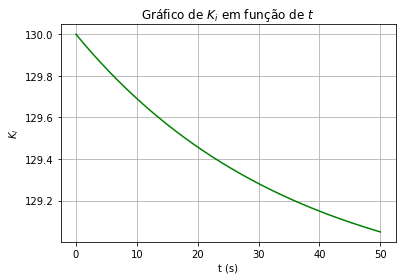

In [34]:
plt.figure()
plt.plot(Tempo, K_I, color="green")
plt.title(r"Gráfico de ${K}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${K}_i$")
plt.grid(True)
plt.savefig("g14.png")
plt.show()

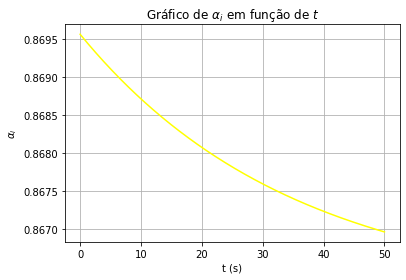

In [35]:
plt.figure()
plt.plot(Tempo, Alpha_I, color="yellow")
plt.title(r"Gráfico de $\alpha_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\alpha_i$")
plt.grid(True)
plt.savefig("g15.png")
plt.show()

## **Alteração 3: $I_{max}$ = 25**

In [36]:
Imax = 25

In [37]:
dt = 0.00001                    # Passo de tempo
li = 0                          # Limite Inferior - define instante de tempo inicial
ls = 50                         # Limite Superior - define instante de tempo final
N = abs(ls - li) / dt           # Número total de iterações consideradas
t = li;                         # Tempo inicial

V = []                          # Vetor com o potencial da membrana a cada instante de tempo
V.append(V0)
Na_I = []                       # Vetor com a concentração de Sódio no meio intracelular a cada instante de tempo
Na_I.append(Na_i0)
K_I = []                        # Vetor com a concentração de Potássio no meio intracelular a cada instante de tempo
K_I.append(K_i0)
Alpha_I = []                    # Vetor com o valor de alpha_i (volume interno / volume total) a cada instante de tempo
Alpha_I.append(alpha_i0)
dAlpha_I = []                   # Vetor com o valor da derivada de alpha_i a cada instante de tempo
dAlpha_I.append(0)
Pi = []                         # Vetor com a pressão no meio intracelular a cada instante de tempo
Pi.append(calc_pi(alpha_i0))
INa = []                        # Vetor com a corrente de Sódio a cada instante de tempo
INa.append(calc_INa(Na_i0, V0))
IK = []                         # Vetor com a corrente de Potássio a cada instante de tempo
IK.append(calc_IK(K_i0, V0))
Tempo = []                     # Vetor com cada instante de tempo
Tempo.append(t)

# Aplicação do Método de Euler Explícito
for k in range(1, int(N + 1)):

  # Cálculo da derivada da concentração de sódio no meio intracelular
  dNa_i = calc_dNa_i(Alpha_I[k - 1], INa[k - 1], Na_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada da concentração de potássio no meio intracelular
  dK_i = calc_dK_i(Alpha_I[k - 1], IK[k - 1], Na_I[k - 1], K_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada de alpha_i
  dAlpha_i = calc_dAlpha_i(Pi[k - 1], Na_I[k - 1], K_I[k - 1], Alpha_I[k - 1])
  # Cálculo da derivada do potencial da membrana
  dV = calc_dV(INa[k - 1], IK[k - 1], Na_I[k - 1])

  # Atribuição da concentração de sódio, no meio intracelular, na iteração k
  Na_I.append(dNa_i * dt + Na_I[k - 1])
  # Atribuição da concentração de potássio, no meio intracelular, na iteração k
  K_I.append(dK_i * dt + K_I[k - 1])
  # Atribuição de alpha_i na iteração k
  Alpha_I.append(dAlpha_i * dt + Alpha_I[k - 1])
  # Atribuição do potencial da membrana na iteração k
  V.append(dV * dt + V[k - 1])
  # Atribuição do instante de tempo na iteração k
  Tempo.append(Tempo[-1] + dt)
  # Atribuição da derivada de alpha_i na iteração k
  dAlpha_I.append(dAlpha_i)
  # Atribuição da pressão intracelular na iteração k
  Pi.append(calc_pi(Alpha_I[k]))
  # Atribuição da corrente de sódio na iteração k
  INa.append(calc_INa(Na_I[k], V[k]))
  # Atribuição da corrente de potássio na iteração k
  IK.append(calc_IK(K_I[k], V[k]))

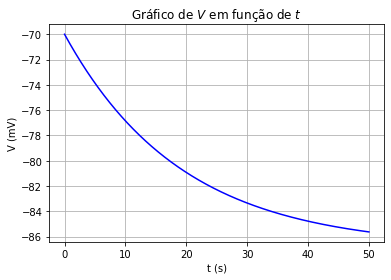

In [38]:
plt.figure()
plt.plot(Tempo, V,color='blue')
plt.title(r"Gráfico de ${V}$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.savefig("g16.png")
plt.show()

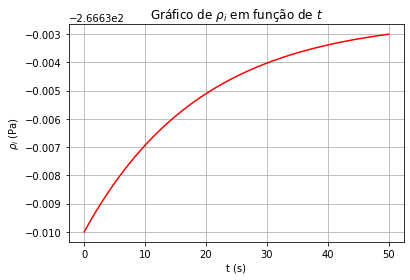

In [39]:
plt.figure()
plt.plot(Tempo, Pi, color='red')
plt.title(r"Gráfico de $\rho_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\rho_i$ (Pa)")
plt.grid(True)
plt.savefig("g17.png")
plt.show()

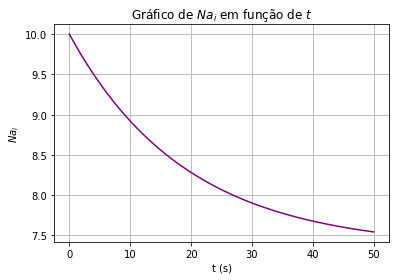

In [40]:
plt.figure()
plt.plot(Tempo, Na_I, color="purple")
plt.title(r"Gráfico de ${Na}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${Na}_i$")
plt.grid(True)
plt.savefig("g18.png")
plt.show()

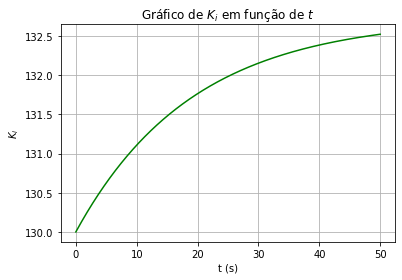

In [41]:
plt.figure()
plt.plot(Tempo, K_I, color="green")
plt.title(r"Gráfico de ${K}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${K}_i$")
plt.grid(True)
plt.savefig("g19.png")
plt.show()

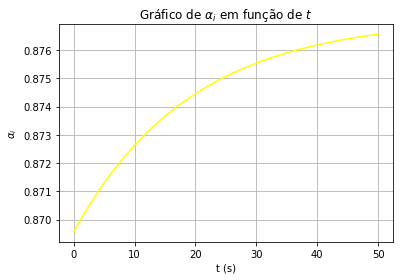

In [42]:
plt.figure()
plt.plot(Tempo, Alpha_I, color="yellow")
plt.title(r"Gráfico de $\alpha_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\alpha_i$")
plt.grid(True)
plt.savefig("g20.png")
plt.show()

## **Alteração 4: $I_{max}$ = 50**


In [43]:
Imax = 50

In [44]:
dt = 0.00001                    # Passo de tempo
li = 0                          # Limite Inferior - define instante de tempo inicial
ls = 50                         # Limite Superior - define instante de tempo final
N = abs(ls - li) / dt           # Número total de iterações consideradas
t = li;                         # Tempo inicial

V = []                          # Vetor com o potencial da membrana a cada instante de tempo
V.append(V0)
Na_I = []                       # Vetor com a concentração de Sódio no meio intracelular a cada instante de tempo
Na_I.append(Na_i0)
K_I = []                        # Vetor com a concentração de Potássio no meio intracelular a cada instante de tempo
K_I.append(K_i0)
Alpha_I = []                    # Vetor com o valor de alpha_i (volume interno / volume total) a cada instante de tempo
Alpha_I.append(alpha_i0)
dAlpha_I = []                   # Vetor com o valor da derivada de alpha_i a cada instante de tempo
dAlpha_I.append(0)
Pi = []                         # Vetor com a pressão no meio intracelular a cada instante de tempo
Pi.append(calc_pi(alpha_i0))
INa = []                        # Vetor com a corrente de Sódio a cada instante de tempo
INa.append(calc_INa(Na_i0, V0))
IK = []                         # Vetor com a corrente de Potássio a cada instante de tempo
IK.append(calc_IK(K_i0, V0))
Tempo = []                     # Vetor com cada instante de tempo
Tempo.append(t)

# Aplicação do Método de Euler Explícito
for k in range(1, int(N + 1)):

  # Cálculo da derivada da concentração de sódio no meio intracelular
  dNa_i = calc_dNa_i(Alpha_I[k - 1], INa[k - 1], Na_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada da concentração de potássio no meio intracelular
  dK_i = calc_dK_i(Alpha_I[k - 1], IK[k - 1], Na_I[k - 1], K_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada de alpha_i
  dAlpha_i = calc_dAlpha_i(Pi[k - 1], Na_I[k - 1], K_I[k - 1], Alpha_I[k - 1])
  # Cálculo da derivada do potencial da membrana
  dV = calc_dV(INa[k - 1], IK[k - 1], Na_I[k - 1])

  # Atribuição da concentração de sódio, no meio intracelular, na iteração k
  Na_I.append(dNa_i * dt + Na_I[k - 1])
  # Atribuição da concentração de potássio, no meio intracelular, na iteração k
  K_I.append(dK_i * dt + K_I[k - 1])
  # Atribuição de alpha_i na iteração k
  Alpha_I.append(dAlpha_i * dt + Alpha_I[k - 1])
  # Atribuição do potencial da membrana na iteração k
  V.append(dV * dt + V[k - 1])
  # Atribuição do instante de tempo na iteração k
  Tempo.append(Tempo[-1] + dt)
  # Atribuição da derivada de alpha_i na iteração k
  dAlpha_I.append(dAlpha_i)
  # Atribuição da pressão intracelular na iteração k
  Pi.append(calc_pi(Alpha_I[k]))
  # Atribuição da corrente de sódio na iteração k
  INa.append(calc_INa(Na_I[k], V[k]))
  # Atribuição da corrente de potássio na iteração k
  IK.append(calc_IK(K_I[k], V[k]))

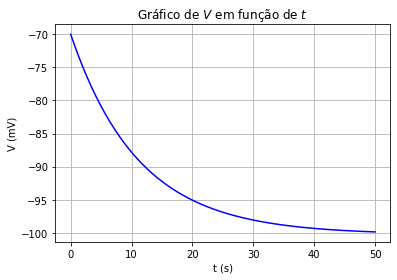

In [45]:
plt.figure()
plt.plot(Tempo, V,color='blue')
plt.title(r"Gráfico de ${V}$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.savefig("g21.png")
plt.show()

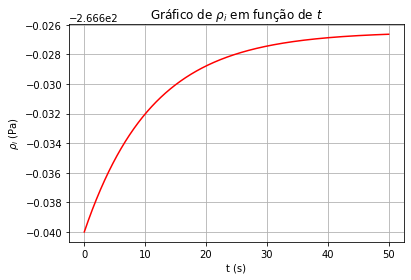

In [46]:
plt.figure()
plt.plot(Tempo, Pi, color='red')
plt.title(r"Gráfico de $\rho_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\rho_i$ (Pa)")
plt.grid(True)
plt.savefig("g22.png")
plt.show()

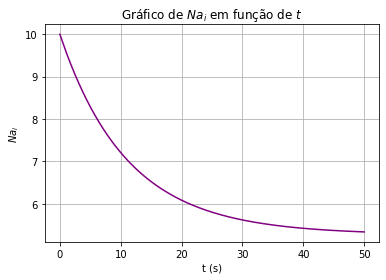

In [47]:
plt.figure()
plt.plot(Tempo, Na_I, color="purple")
plt.title(r"Gráfico de ${Na}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${Na}_i$")
plt.grid(True)
plt.savefig("g23.png")
plt.show()

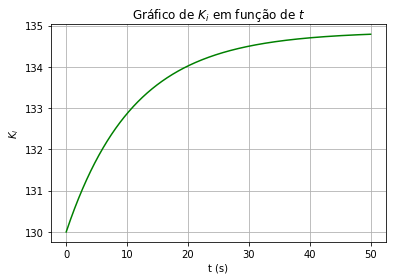

In [48]:
plt.figure()
plt.plot(Tempo, K_I, color="green")
plt.title(r"Gráfico de ${K}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${K}_i$")
plt.grid(True)
plt.savefig("g24.png")
plt.show()

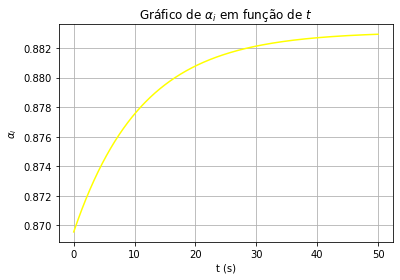

In [49]:
plt.figure()
plt.plot(Tempo, Alpha_I, color="yellow")
plt.title(r"Gráfico de $\alpha_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\alpha_i$")
plt.grid(True)
plt.savefig("g25.png")
plt.show()

## **Alteração 5: $I_{max}$ = 100**

In [50]:
Imax = 100

In [51]:
dt = 0.00001                    # Passo de tempo
li = 0                          # Limite Inferior - define instante de tempo inicial
ls = 50                         # Limite Superior - define instante de tempo final
N = abs(ls - li) / dt           # Número total de iterações consideradas
t = li;                         # Tempo inicial

V = []                          # Vetor com o potencial da membrana a cada instante de tempo
V.append(V0)
Na_I = []                       # Vetor com a concentração de Sódio no meio intracelular a cada instante de tempo
Na_I.append(Na_i0)
K_I = []                        # Vetor com a concentração de Potássio no meio intracelular a cada instante de tempo
K_I.append(K_i0)
Alpha_I = []                    # Vetor com o valor de alpha_i (volume interno / volume total) a cada instante de tempo
Alpha_I.append(alpha_i0)
dAlpha_I = []                   # Vetor com o valor da derivada de alpha_i a cada instante de tempo
dAlpha_I.append(0)
Pi = []                         # Vetor com a pressão no meio intracelular a cada instante de tempo
Pi.append(calc_pi(alpha_i0))
INa = []                        # Vetor com a corrente de Sódio a cada instante de tempo
INa.append(calc_INa(Na_i0, V0))
IK = []                         # Vetor com a corrente de Potássio a cada instante de tempo
IK.append(calc_IK(K_i0, V0))
Tempo = []                     # Vetor com cada instante de tempo
Tempo.append(t)

# Aplicação do Método de Euler Explícito
for k in range(1, int(N + 1)):

  # Cálculo da derivada da concentração de sódio no meio intracelular
  dNa_i = calc_dNa_i(Alpha_I[k - 1], INa[k - 1], Na_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada da concentração de potássio no meio intracelular
  dK_i = calc_dK_i(Alpha_I[k - 1], IK[k - 1], Na_I[k - 1], K_I[k - 1], dAlpha_I[k - 1])
  # Cálculo da derivada de alpha_i
  dAlpha_i = calc_dAlpha_i(Pi[k - 1], Na_I[k - 1], K_I[k - 1], Alpha_I[k - 1])
  # Cálculo da derivada do potencial da membrana
  dV = calc_dV(INa[k - 1], IK[k - 1], Na_I[k - 1])

  # Atribuição da concentração de sódio, no meio intracelular, na iteração k
  Na_I.append(dNa_i * dt + Na_I[k - 1])
  # Atribuição da concentração de potássio, no meio intracelular, na iteração k
  K_I.append(dK_i * dt + K_I[k - 1])
  # Atribuição de alpha_i na iteração k
  Alpha_I.append(dAlpha_i * dt + Alpha_I[k - 1])
  # Atribuição do potencial da membrana na iteração k
  V.append(dV * dt + V[k - 1])
  # Atribuição do instante de tempo na iteração k
  Tempo.append(Tempo[-1] + dt)
  # Atribuição da derivada de alpha_i na iteração k
  dAlpha_I.append(dAlpha_i)
  # Atribuição da pressão intracelular na iteração k
  Pi.append(calc_pi(Alpha_I[k]))
  # Atribuição da corrente de sódio na iteração k
  INa.append(calc_INa(Na_I[k], V[k]))
  # Atribuição da corrente de potássio na iteração k
  IK.append(calc_IK(K_I[k], V[k]))

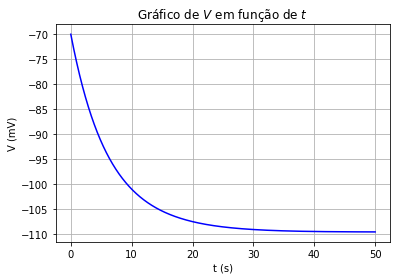

In [52]:
plt.figure()
plt.plot(Tempo, V,color='blue')
plt.title(r"Gráfico de ${V}$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.savefig("g26.png")
plt.show()

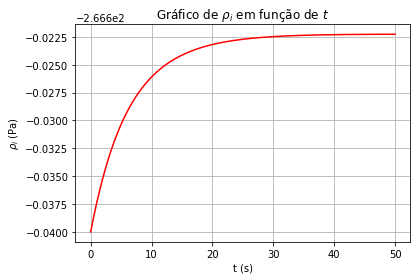

In [53]:
plt.figure()
plt.plot(Tempo, Pi, color='red')
plt.title(r"Gráfico de $\rho_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\rho_i$ (Pa)")
plt.grid(True)
plt.savefig("g27.png")
plt.show()

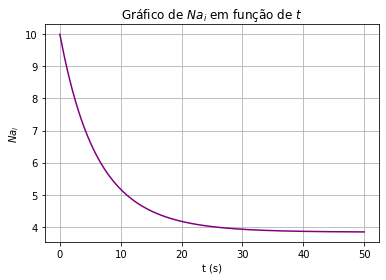

In [54]:
plt.figure()
plt.plot(Tempo, Na_I, color="purple")
plt.title(r"Gráfico de ${Na}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${Na}_i$")
plt.grid(True)
plt.savefig("g28.png")
plt.show()

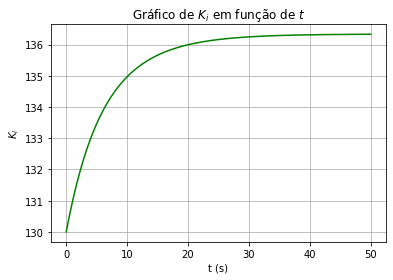

In [55]:
plt.figure()
plt.plot(Tempo, K_I, color="green")
plt.title(r"Gráfico de ${K}_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"${K}_i$")
plt.grid(True)
plt.savefig("g29.png")
plt.show()

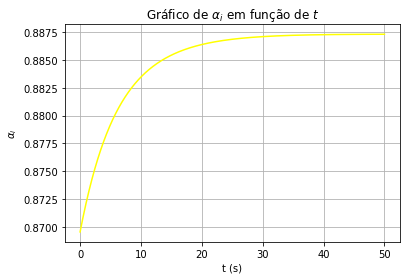

In [56]:
plt.figure()
plt.plot(Tempo, Alpha_I, color="yellow")
plt.title(r"Gráfico de $\alpha_i$ em função de ${t}$")
plt.xlabel("t (s)")
plt.ylabel(r"$\alpha_i$")
plt.grid(True)
plt.savefig("g30.png")
plt.show()